In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
 
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 불러오기

In [3]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


### 2. 데이터 구조 파악

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [6]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2007.5,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,0.0,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,2007.5,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,2007.5,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,2007.5,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,2007.5,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,2007.5,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


##### 2-1 데이터 컬럼 정리


**1. 부동소수점형 컬럼 (float64)**
- `Year`: 연도
- `Infant_deaths`: 영아 사망 수
- `Under_five_deaths`: 5세 이하 사망 수
- `Adult_mortality`: 성인 사망률
- `Alcohol_consumption`: 1인당 알코올 소비량
- `Hepatitis_B`: B형 간염 예방접종률
- `Measles`: 홍역 사례 수
- `BMI`: 평균 BMI(체질량지수)
- `Polio`: 소아마비 예방접종률
- `Diphtheria`: 디프테리아 예방접종률
- `Incidents_HIV`: HIV 발생 건수
- `GDP_per_capita`: 1인당 GDP
- `Population_mln`: 인구(백만 명 단위)
- `Thinness_ten_nineteen_years`: 10-19세의 저체중 비율
- `Thinness_five_nine_years`: 5-9세의 저체중 비율
- `Schooling`: 평균 교육 연수
- `Life_expectancy`: 기대수명

**2. 객체형 컬럼 (object)**
- `Country`: 국가명
- `Region`: 지역명
- `Economy_status`: 경제 상태 (예: 저소득, 중소득, 고소득)


### 3. 전처리

##### 3-1 결측값 확인

In [3]:
print(df.isnull().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64


* 결측값이 없는 완벽한 데이터

##### 3-2 이상치 확인

* 숫자형은 boxplot을 통해 사분위수를 기준으로 이상값을 확인
* 범주형은 value_counts를 통해 카테고리의 빈도를 확인하여 특정 카테고리의 빈도가 비정상적으로 높거나 낮지 않은지 확인

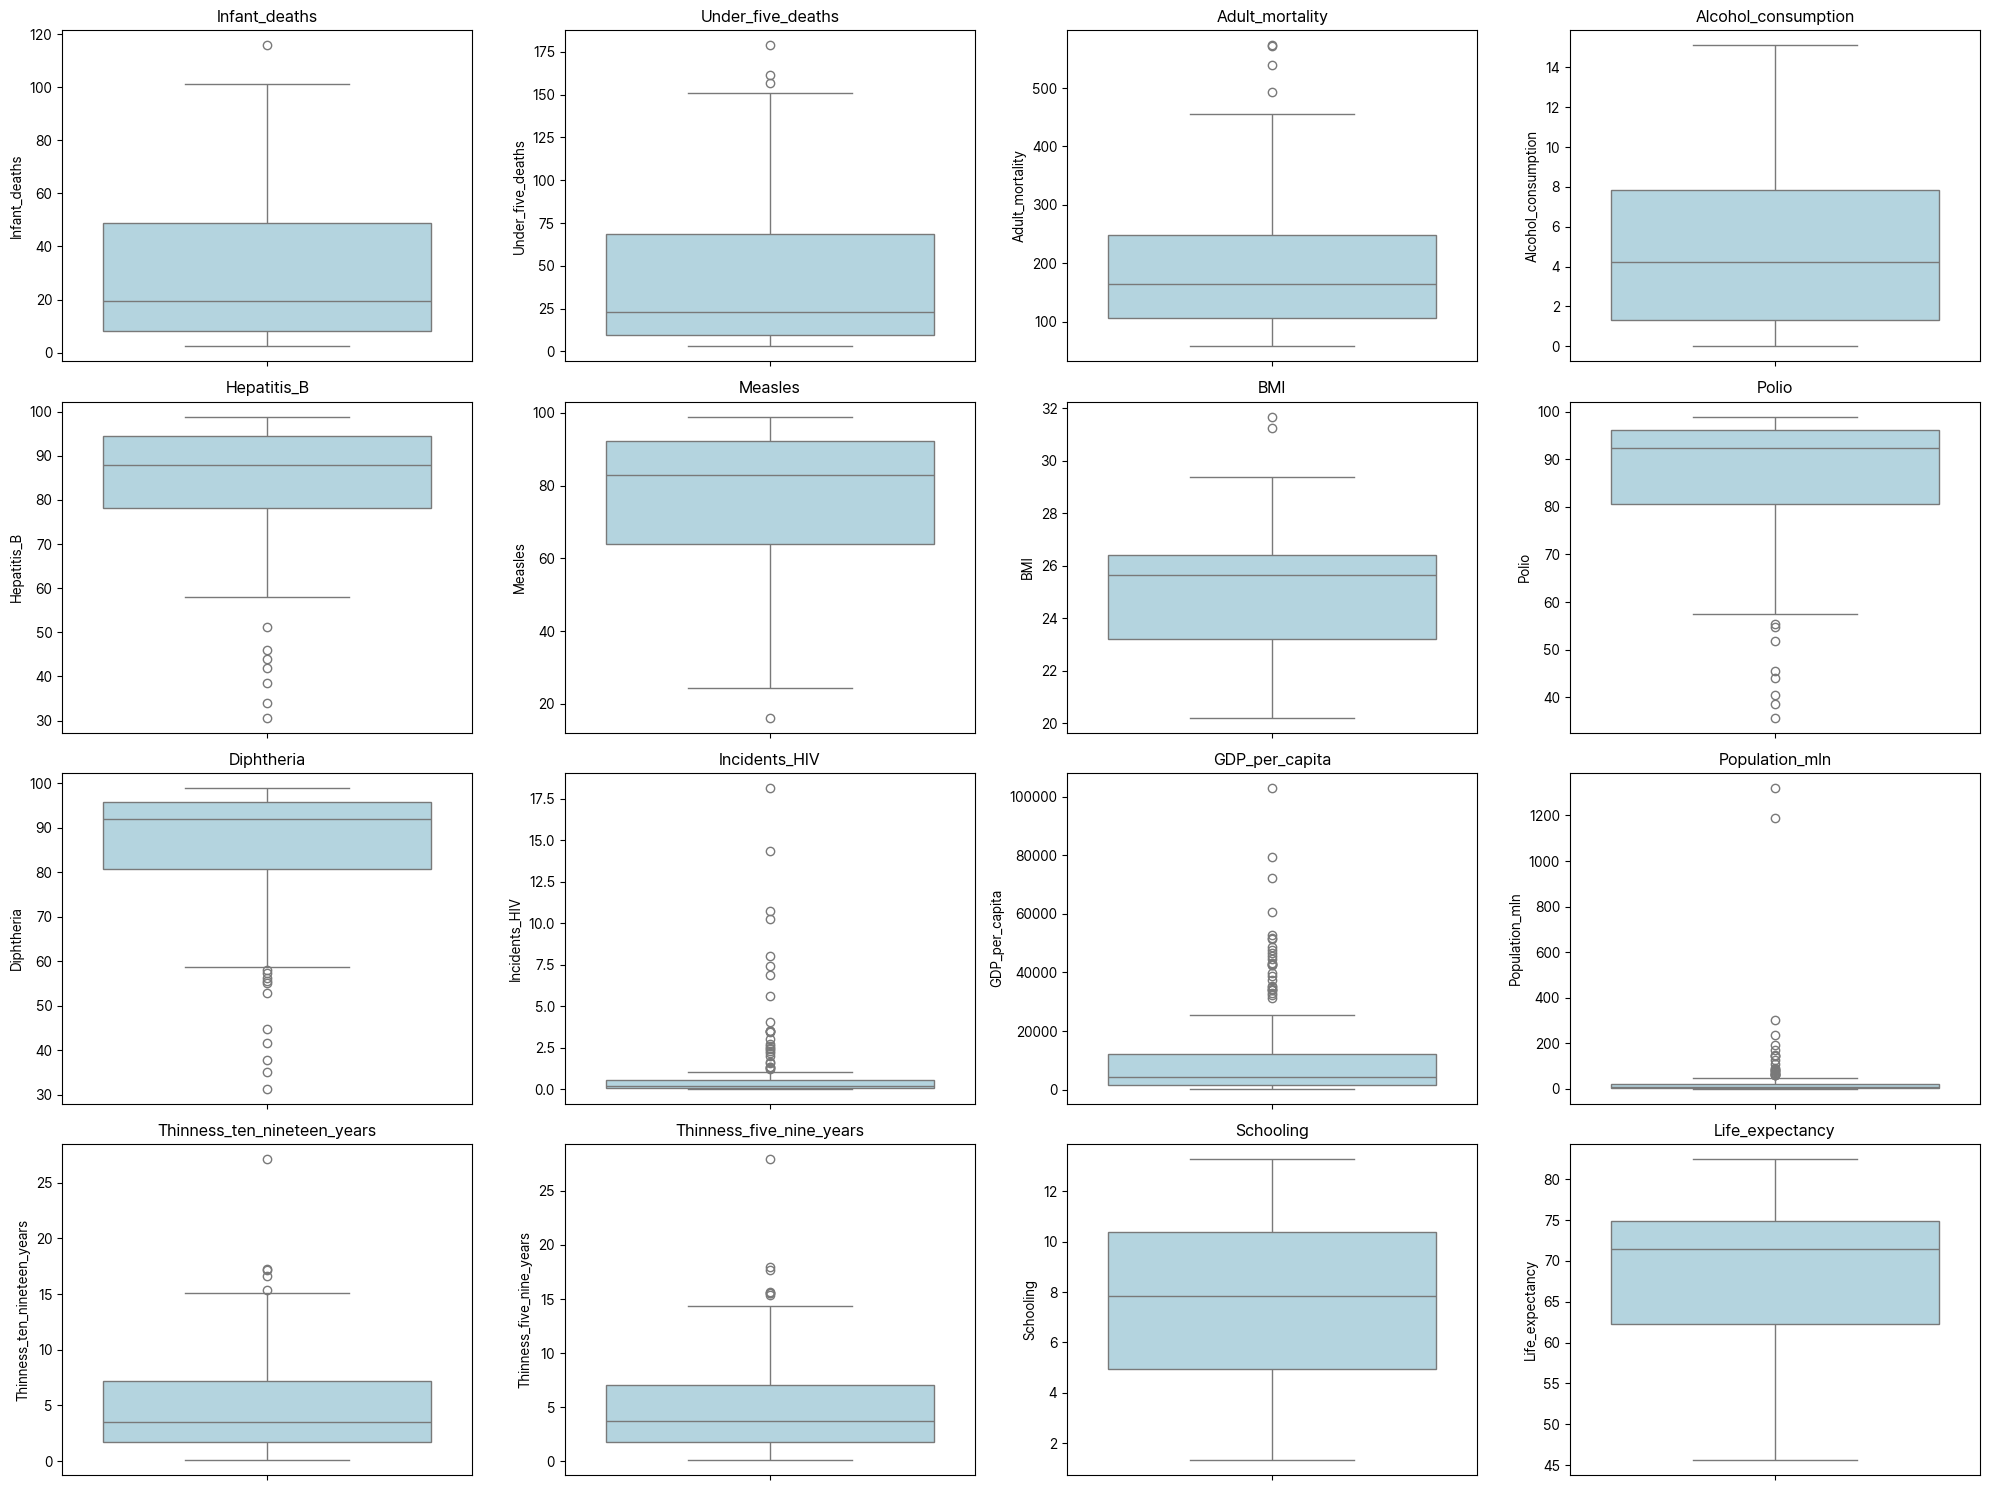

In [7]:
columns = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 
    'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 
    'Population_mln', 'Thinness_ten_nineteen_years', 
    'Thinness_five_nine_years', 'Schooling', 'Life_expectancy'
]

# 박스플롯 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

* 수치형 변수의 경우 `Alcohol_consumption`, `Schooling`, `Life_expectancy` 컬럼을 제외하고 모두 사분위수 기준으로 판단했을 때 이상값이 존재한다.
* 하지만 아직 변수별 특성을 모르기 때문에 사분위수만으로 이상치를 판단하여 제거하기에는 무리가 있을 것 이라 판단하였다. 
* 따라서 컬럼별로 분석해보며 이상값에 대해 자세히 들여다 보려고 한다.

In [11]:
columns = ['Country', 'Region', 'Year']


def display_value_counts(columns, dtype):
    for column in columns:
        print(f"Value counts for {column} ({dtype}):\n")
        print(df[column].value_counts())  
        print("-" * 50)

print("=== Object형 Columns ===")
display_value_counts(columns, "Object")

=== Object형 Columns ===
Value counts for Country (Object):

Country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Venezuela, RB          1
Vietnam                1
Yemen, Rep.            1
Zambia                 1
Zimbabwe               1
Name: count, Length: 179, dtype: int64
--------------------------------------------------
Value counts for Region (Object):

Region
Africa                           51
Asia                             27
European Union                   27
Central America and Caribbean    19
Rest of Europe                   15
Middle East                      14
South America                    12
Oceania                          11
North America                     3
Name: count, dtype: int64
--------------------------------------------------
Value counts for Year (Object):

Year
2007.5    179
Name: count, dtype: int64
----------------------------------------------

In [14]:
df['Country'].value_counts().unique()

array([1])

* `country`컬럼의 경우 모든 나라가 1개만 들어가 있어야 하는데, 확인 결과 1개씩만 들어가 있어서 이상값이 없다고 판단하였다.
* `Region`은 각 대륙별 나라 갯수를 나타내고 있는데 2007년도 기준 대륙별 국가 수와 일치하기에 이상치가 없다고 판단하였다.
* `year` 컬럼의 경우 2007.5로 고정되어있기 때문에 eda에서 연도에 따른 유의미한 인사이트를 도출할 수는 없다고 판단해서 eda시 제외하였다.